# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

During this project will be performed analyzing, cleaning up, and ploting data as well as pose questions and seek to answer them in a meaningful way.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park?
- Which park has the highest and the lowest number of mammals?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Scoping

Most fof the time it is helpfull to screat a Scope of work and anilize each step for better performing. 
Four sections were created below to help guide the project's process and progress. 
The first section is the project goals, this section will define the high-level objectives and set the goals for this project. The next section is the data, data for the current project is already provided but still needs to be checked if project goals can be met with the available data. Third section is analysis will have to be thought through, which include the methods and questions that are aligned with the project goals. Lastly, the forth sectiion evaluation will help us build conclusions and findings from the analysis.

### Project Goals

In this project we will be going through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

1. What is the distribution of conservation status for species?
2. Are certain types of species more likely to be endangered?
3. Are the differences between species and their conservation status significant?
4. Which species were spotted the most at each park?
5. Which park has the highest and the lowest number of mammals?
6. Which animal is most prevalent and what is their distribution amongst parks?

### Data

This project has two data sets that came with the package. The first `csv` file contains data about different species and their conservation status; and second holds recorded sightings of different species at several national parks for the past 7 days. This data will be used to analyze the goals of the project and answer on the question.

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.

## Import Python Modules

First, import the primary modules that will be used in this project:

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Data
To analyze the status of conservation of species and their observations in national parks, load the datasets into `DataFrames`. Once loaded as `DataFrames` the data can be explored and visualized with Python.

In the next steps, `Observations.csv`  and `Species_info.csv` are read in as `DataFrames` called `observations` and `species` respectively. The newly created `DataFrames` are glimpsed with `.head()` to check its contents (loaded first 5 rows for review).

#### species

The `species_info.csv` contains information on the different species in the USA National Parks. The columns in the data set include:

- **category** - The class of animal
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - Each species’ current conservation status

After will check the dimensions of the data set. 

In [2]:
species = pd.read_csv('species_info.csv', encoding='utf-8')
species.head(5)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
print(f'species data set: {species.shape}')

species data set: (5824, 4)


#### observations

The `observations.csv` contains information about number of time each species are observed in the certain National Park. The columns in the data set include:

- **scientific_name** - The scientific name of each species
- **park_name** - Park where species were found
- **observations** - The number of times each species was observed at park

After will check the dimensions of the data set.

In [4]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
observations.head(5)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
print(f'observations data set: {observations.shape}')

observations data set: (23296, 3)


#### Explore the Data
Once we have data, it’s a good idea to get acquainted with it. 

The first thing is to find the number of distinct species in the data. Use the column scientific_name to get 5,541 unique species - this was count across all national parks. 

In [6]:
print(f'number of unique species: {species.scientific_name.nunique()}')

number of unique species: 5541


All species devided into few categories. 

In [7]:
print(f'number of categories: {species.category.nunique()}')
print(f'categories are: {species.category.unique()}')

number of categories: 7
categories are: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


We also can count of `category` in the data. Vascular plants are by far the largest amount of species with 4,470 in the data, 
with reptiles being the fewest with 79.

In [8]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

### Analysis 
#### Research Question 1: What is the distribution of conservation status for species?

In our first task we need to explore `conservation_status` of the species. 

In [9]:
print(f'number of conservation_status: {species.conservation_status.nunique()}')
print(f'conservation_status like: {species.conservation_status.unique()}')

number of conservation_status: 4
conservation_status like: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


We have 4 possible values and NaN. 

- `Species of Concern`: a plant or animal for which we have concerns about its ability to remain on a landscape for a long time
- `Threatened`: a species is likely to become endangered within the foreseeable future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: the process of restoring endangered and threatened species to the point where they no longer require the safeguards of the Endangered Species Act (ESA)


In [10]:
species.groupby('conservation_status').size().reset_index()

,conservation_status,0
0,Endangered,16
1,In Recovery,4
2,Species of Concern,161
3,Threatened,10


In [11]:
conservationStatus_tb = species.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
conservationStatus_tb

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


In those cases where we have `NaN` - meaning that no species in the current `conservation status`. 
In next step we can show those results graphically, to visualize better the numbers.

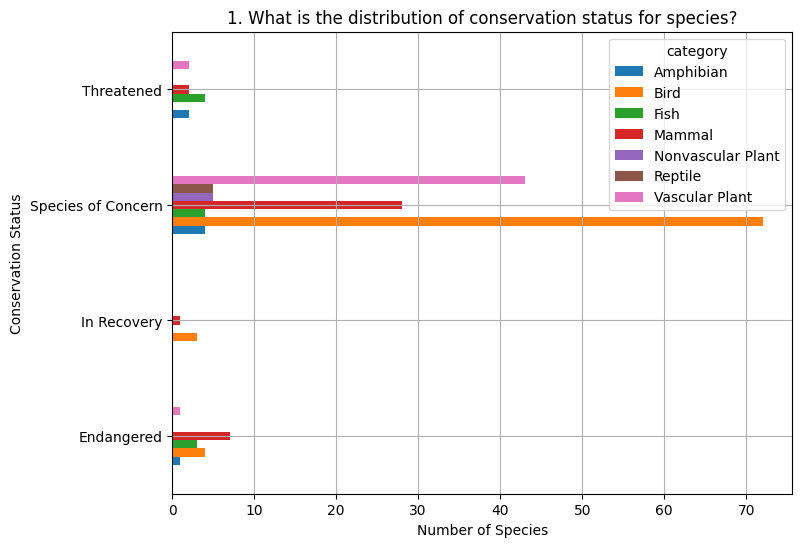

In [12]:
cs_plot = conservationStatus_tb.plot(kind = 'barh', 
                                     figsize=(8,6), 
                                     stacked=False, 
                                     title='1. What is the distribution of conservation status for species?',
                                    legend=True,
                                    grid=True)

cs_plot.set_ylabel("Conservation Status");
cs_plot.set_xlabel("Number of Species");

#### Reaserch Question 2: Are certain types of species more likely to be endangered?

Those species, which doesn't have `Conservation Status` - are `not protected`, and might have higher chance to be endangered.

Because `group by` does not include `none` we need to change it into for example `N/A`. 

In [13]:
species.fillna('No Intervention', inplace=True)

In [14]:
protection_counts= \
            species.groupby('conservation_status').scientific_name.nunique().reset_index().sort_values(by='scientific_name')

protection_counts

,conservation_status,scientific_name
1,In Recovery,4
4,Threatened,10
0,Endangered,15
3,Species of Concern,151
2,No Intervention,5363


Now we can creat bar chart to represend current table information.

1. Start by creating a wide figure with `figsize=(10, 4)`
2. Start by creating an axes object called `ax` using `plt.subplot`.
3. Create a bar chart whose heights are equal to `scientific_name` column of `protection_counts`.
4. Create an x-tick for each of the bars.
5. Label each x-tick with the label from `conservation_status` in `protection_counts`
6. Label the y-axis `Number of Species`
7. Title the graph `Conservation Status by Species`
8. Plot the graph using `plt.show()`

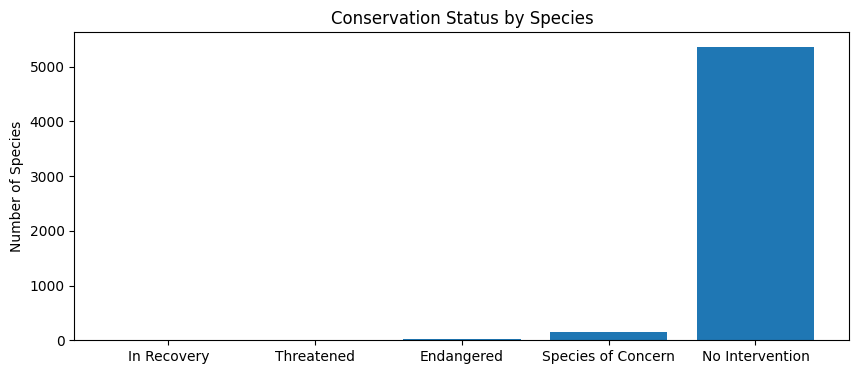

In [15]:
plt.figure(figsize=(10, 4))
ax = plt.subplot()
plt.bar(range(len(protection_counts)),
        protection_counts.scientific_name.values)
ax.set_xticks(range(len(protection_counts)))
ax.set_xticklabels(protection_counts.conservation_status.values)
plt.ylabel('Number of Species')
plt.title('Conservation Status by Species')
plt.show()

Let's create a new column in species called `is_protected`, which is True if `conservation_status` is not equal to `No Intervention`, and False otherwise.

In [16]:
species['is_protected'] = species.conservation_status != 'No Intervention'

species.head(5)

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


Let's group the species data frame by the `category` and `is_protected` columns and count the unique scientific_names in each grouping.`Pivot` function will help to rearrange data frame into cross table style that will be ready for chi2 test.`.columns` property will rename the categories `True` and `False` to more descriptive names.

Save results to `category_counts`.

Let's see how will look like the summary table:  

In [17]:
protected_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()

protected_counts.columns = ['category', 'not_protected', 'protected']

protected_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Adding column about persentage of protected species, rounded to two decimal points: 

In [18]:
protected_counts['% of protected species'] = (protected_counts.protected/ \
                                (protected_counts.protected + protected_counts.not_protected) * 100).round(2)

protected_counts

,category,not_protected,protected,% of protected species
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


By looking at above table, We can see that `Mammals` and `Birds` had the highest percentage of being `in protection`.

#### Research Question 3: Are the differences between species and their conservation status significant?

##### Statistical Significance

This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi-squared test, a contingency table will need to be created. The contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The first test will be called `contingency1` and will need to be filled with the correct numbers for mammals and birds.

First we run chi-2 test to see if there is significant difference in `conservation status` rate of `Mammals` and `Birds`.By using data from `category_counts` table we can fill `contingency1` table with the correct values.

In [19]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]

chi2, pval, dof, expected = chi2_contingency(contingency1)
print(pval.round(5))

0.68759


Now we can see that p-value of test is 0.69, which is so much larger than standard significant threshold(0.05).This means that this difference is not significant!

Let's test another. Is the difference between `Reptile` and `Mammal` significant?

In [20]:
contingency2 = [[30, 146],
               [5, 73]]

chi2, pval, dof, expected = chi2_contingency(contingency2)

print(pval.round(5))

0.03836


This time the p-value(0.038) is smaller than standard significant threshold(0.05).This tells us that there is a significant difference between `Reptile` and `Mammal`.

Let's test another. Is the difference between `Amphibian` and `Vascular Plant` significant?

In [21]:
contingency3 = [[72, 7],
               [4216, 46]]

chi2, pval, dof, expected = chi2_contingency(contingency3)

print(pval)

1.0441355146657018e-08


This time the p-value is very low and this means that difference between `Amphibian` and `Vascular Plant` is statistically significant.

By this anlysis we can conclude that there is association between species `category` and their `conservation status`.

#### Research Question 4: Which species were spotted the most at each park?

In this question we will analyze each park separatly and check which species were spotted in which park. 

In [22]:
y = observations.groupby(['park_name', 'scientific_name'])['observations'].max().reset_index()\
                                                                          .sort_values(by='observations', ascending=False)

y.groupby('park_name').first()

,scientific_name,observations
park_name,,
Bryce National Park,Valerianella radiata,176
Great Smoky Mountains National Park,Sonchus asper ssp. asper,147
Yellowstone National Park,Lycopodium tristachyum,321
Yosemite National Park,Ivesia shockleyi var. shockleyi,223


By using the above dataframe we can see that:

1. The most spotted species in Bryce National Park is `Valerianella radiata`.
2. The most spotted species in Great Smoky Mountains National Park is `Sonchus asper ssp. asper`.
3. The most spotted species in Yellowstone National Park is `Lycopodium tristachyum`.
4. The most spotted species in Yosemite National Park is `Ivesia shockleyi var. shockleyi`.

#### Research Question 5: Which park has the highest and the lowest number of mammals ?

Using below data frame we can count number of mammals.

In [23]:
z = observations.merge(species)

mammal_specis = z[z.category == "Mammal"]

mammal_specis.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,28830
1,Great Smoky Mountains National Park,21056
2,Yellowstone National Park,70701
3,Yosemite National Park,42533


Yellowstone National Park has the highest and Great Smoky Mountains National Park has the lowest number of mammals.

The same dataframe we can use for other species category, for example `Fish`. 

In [24]:
z = observations.merge(species)

mammal_specis = z[z.category == "Fish"]

mammal_specis.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,12823
1,Great Smoky Mountains National Park,9482
2,Yellowstone National Park,31459
3,Yosemite National Park,19137


Yellowstone National Park has the highest and Great Smoky Mountains National Park has the lowest number of fish.

#### Research Question 6: Which animal is most prevalent and what is their distribution amongst parks?

Conservationists have been recording sightings of different species at several national parks for the past 7 days. They've saved sent you their observations in a file called `observations.csv`.

First we have to look at the the common names from species data frame to find the most prevalent animals in the dataset.If we look at `common_names` column of species, we can see that the data needs cleaning.We have to clean it from punctuation and split it into seperate words.

In [25]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:5]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

Now we have to drop duplicates words from each row because they should not be counted more than once per species.For example you can see that in the second row we have two 'Bison' that refers to the same animal.

In [26]:
cleanRows = [list(set(x)) for x in common_Names]

cleanRows[:5]

[['Vole', 'RedBacked', 'Gappers'],
 ['American', 'Bison'],
 ['Cattle', 'Aurochs', 'Domesticated', 'Domestic', 'Feral'],
 ['Mouflon', 'Red', 'Domestic', 'Sheep', 'Feral'],
 ['Elk', 'Or', 'Wapiti']]

Now we have to combine all the list and count the frequency of each animal.

In [27]:
combinedList = []

for lst in cleanRows:
    for item in lst:
        combinedList.append(item)
        
combinedList[:15]

['Vole',
 'RedBacked',
 'Gappers',
 'American',
 'Bison',
 'Cattle',
 'Aurochs',
 'Domesticated',
 'Domestic',
 'Feral',
 'Mouflon',
 'Red',
 'Domestic',
 'Sheep',
 'Feral']

Now I count the number of occurrences of each word in the combined list and store it in the data frame and sort the data frame by descending order of the words count.

In [28]:
details = dict((item, combinedList.count(item)) for item in set(combinedList))

df = pd.DataFrame({'Word' : list(details.keys()), 'Count' : list(details.values())}).sort_values(by='Count', ascending=False)

df.head(10)

,Word,Count
86,Bat,23
148,Shrew,18
21,Myotis,17
198,Mouse,16
108,Chipmunk,13
19,Squirrel,12
75,American,12
96,Eastern,11
7,Vole,11
113,Western,10


We can see that the most prevalent animal in the data set is bat. Since bats have different `species` with different scientific names, we have to find out which rows of species are referring to `bats`. I create a new column called `is_bat` which is `True` for bats' species and `False` otherwise.

In [29]:
species['is_bat'] = species.common_names.apply(lambda x: True if 'Bat' in x else False)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Below is a subset of the data where `is_bat` is `true`:

In [30]:
species[(species.is_bat) & (species.category == 'Mammal')].head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Now I merge subset of species data frame which stores bats information with observation data frame to find the observations of bats across the four national parks.

In [31]:
bat_observations = observations.merge(species[(species.is_bat) & (species.category == 'Mammal')])

bat_observations.head(10)

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
5,Corynorhinus rafinesquii,Great Smoky Mountains National Park,80,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
6,Corynorhinus rafinesquii,Bryce National Park,57,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
7,Corynorhinus rafinesquii,Yellowstone National Park,259,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
8,Nycticeius humeralis,Yellowstone National Park,219,Mammal,Evening Bat,No Intervention,False,True
9,Nycticeius humeralis,Bryce National Park,110,Mammal,Evening Bat,No Intervention,False,True


In [32]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


As we can see in the table, `Yellowstone National Park` has the largest number of bats observations by 8362 and `Great Smoky Mountains National Park` has the lowest bats with 2411.

Now let's see each park broken down by `protected bats` vs. `non-protected bat` sightings.

In [33]:
bat_obs_bypark = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()

bat_obs_bypark

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


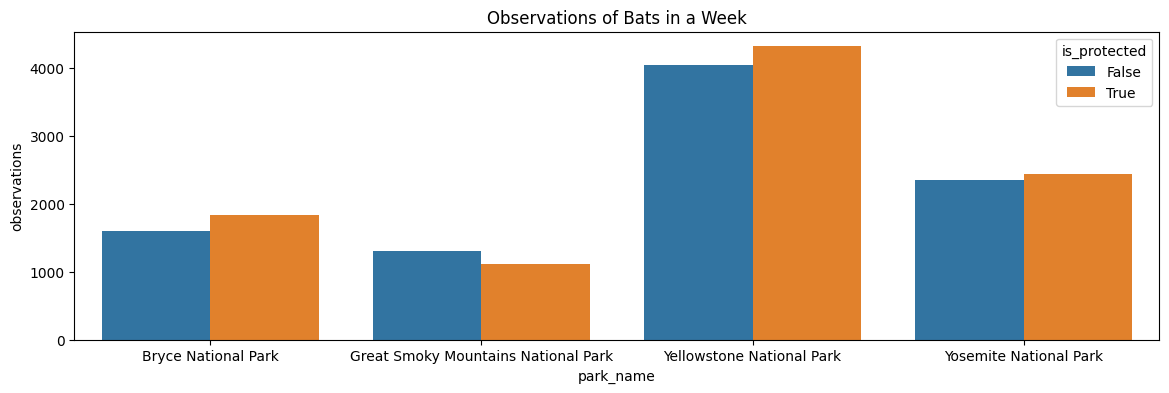

In [34]:
plt.figure(figsize=(14, 4))
sns.barplot(data = bat_obs_bypark, x = 'park_name', y = 'observations', hue = 'is_protected')
plt.title('Observations of Bats in a Week')
plt.show()

As we can see, the number of protected bats in "Yellowstone National Park", "Bryce National Park" and "Yosemite National Park" are more than non-protected ones.But in "Great Smoky Mountains National Park" there are more non-protected bats than protected bats.

Some scientists are studying the number of sheep sightings at different national parks. There are several different scientific names for different types of sheep. We'd like to know which rows of species are referring to sheep. Notice that the following code will tell us whether or not a word occurs in a string:

Let's try an example:

In [35]:
# does 'Sheep' contains in the string? 
str1 = 'Sheep is in this string'
'Sheep' in str1

True

Use `apply` and a `lambda` function to create a new column in `species` called `is_sheep` which is `True` if the common_names contains 'Sheep', and `False` otherwise.

In [36]:
species['is_sheep'] = species.common_names.apply(lambda x: True if 'Sheep' in x else False)

species.head(5)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False,False


Select the rows of `species` where `is_sheep` is `True` and examine the results.

In [37]:
species[species.is_sheep]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,False,True


Many of the results are actually plants. Select the rows of species where `is_sheep` is `True` and `category` is `Mammal`. Save the results to the variable `sheep_species`.

In [38]:
sheep_species = species[(species.is_sheep) & (species.category == 'Mammal')]

sheep_species

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,False,True


Now merge `sheep_species` with `observations` to get a DataFrame with observations of sheep. Save this DataFrame as `sheep_observations`.

In [39]:
sheep_observations = observations.merge(sheep_species)

sheep_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat,is_sheep
0,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
1,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
2,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
3,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
4,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,False,True
5,Ovis canadensis sierrae,Yosemite National Park,39,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,False,True
6,Ovis canadensis sierrae,Bryce National Park,22,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,False,True
7,Ovis canadensis sierrae,Great Smoky Mountains National Park,25,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,False,True
8,Ovis aries,Yosemite National Park,126,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True
9,Ovis aries,Great Smoky Mountains National Park,76,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True


How many total sheep observations (across all three species) were made at each national park? Use groupby to get the sum of observations for each park_name. Save your answer to obs_by_park.

This is the total number of sheep observed in each park over the past 7 days.

In [40]:
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index()

obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


Create a bar chart showing the different number of observations per week at each park.

1. Start by creating a wide figure with `figsize=(16, 4)`
2. Start by creating an axes object called `ax` using `plt.subplot`.
3. Create a bar chart whose heights are equal to `observations` column of `obs_by_park`.
4. Create an `x-tick` for each of the bars.
5. Label each x-tick with the label from `park_name` in `obs_by_park`
6. Label the y-axis `Number of Observations`
7. Title the graph `Observations of Sheep per Week`
8. Plot the grap using `plt.show()`

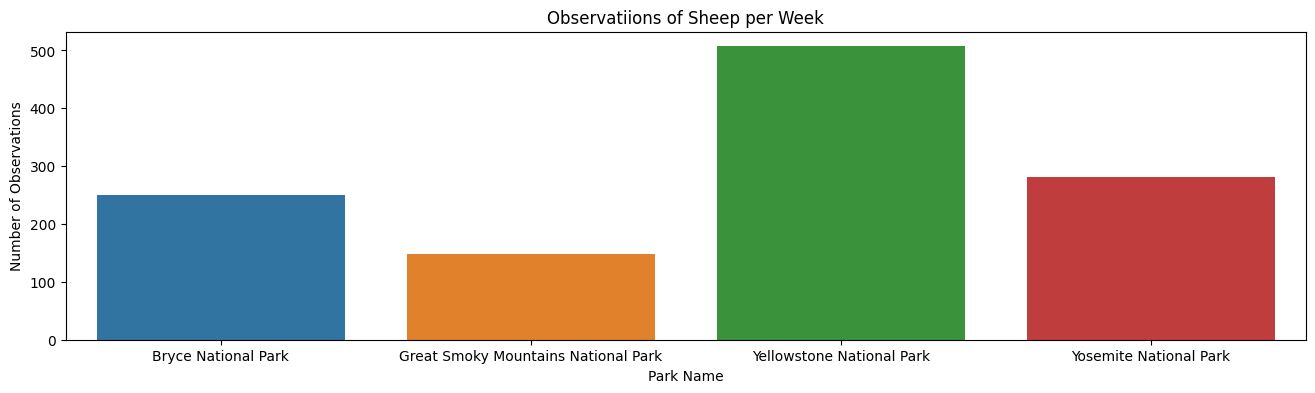

In [41]:
plt.figure(figsize=(16, 4))
ax = plt.subplot()
sns.barplot(data = obs_by_park, x = 'park_name', y = 'observations')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.title('Observatiions of Sheep per Week')
plt.show()

Our scientists know that 15% of sheep at Bryce National Park have foot and mouth disease. Park rangers at Yellowstone National Park have been running a program to reduce the rate of foot and mouth disease at that park. The scientists want to test whether or not this program is working. They want to be able to detect reductions of at least 5 percentage point. For instance, if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence.

Use the [Codecademy sample size calculator](https://s3.amazonaws.com/codecademy-content/courses/learn-hypothesis-testing/a_b_sample_size/index.html) to calculate the number of sheep that they would need to observe from each park. Use the default level of significance (90%).

Remember that `"Minimum Detectable Effect"` is a percent of the baseline.

In [42]:
min_detectable_effect = (15 - 10) / 15 * 100
min_detectable_effect

33.33333333333333

baseline_conversion_rate = 15
statistical_significance = 90

By using `Codecademy sample size calculator`, our sample size is `870`.

How many weeks would you need to observe sheep at Bryce National Park in order to observe enough sheep? How many weeks would you need to observe at Yellowstone National Park to observe enough sheep?

In [43]:
#cause in Bryce National Park we observe 250 sheeps per week, in order to reach to 870 we need 870/250 weeks:
Number_of_weeks_Bryce = 870/250

Number_of_weeks_Bryce

3.48

In [44]:
#cause in Yellowstone Park we observe 250 sheeps per week, in order to reach to 870 we need 870/250 weeks:
Number_of_weeks_Yellowstone = 870/507

Number_of_weeks_Yellowstone

1.7159763313609468

We need 3.5 weeks in Bryce National Park and 1.7 weeks in Yellowstone National Park to obtain enough number of samples.

### Conclusion

- Modules used for the project: pandas, numpy, matplotlib, seaborn.
- Review, analyse and visualized with Python `Observations.csv` and `Species_info.csv`.

##### Analysis Summary:
- The most spotted species in Bryce National Park is `Valerianella radiata`.
- The most spotted species in Great Smoky Mountains National Park is `Sonchus asper ssp. asper`.
- The most spotted species in Yellowstone National Park is `Lycopodium tristachyum`.
- The most spotted species in Yosemite National Park is `Ivesia shockleyi var. shockleyi`.
- Yellowstone National Park has the highest and Great Smoky Mountains National Park has the lowest number of `mammals`.
- Yellowstone National Park has the highest and Great Smoky Mountains National Park has the lowest number of `fish`.
- Yellowstone National Park has the largest number of `bats` observations by 8362 and Great Smoky Mountains National Park has the lowest bats with 2411.
- The most spotted `sheeps` in Yellowstone National Park (507). The lower observed sheeps in Great Smoky Mountains National Park (149).
- In addition we was able to find out: total number of unique species; names and number of categories, together with number of species in each category; analyze different tables and columns; create new table with specific values and many more.  
- Plotted distribution of conservation status; observations of Bats; and observatiions of Sheep.  